<a href="https://colab.research.google.com/github/jdelvalle74/haciendo_ciencia_proyecto_final/blob/main/Proyecto_Final_LSTM_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error, precision_score, recall_score

In [167]:
# 1. Descargar datos
ticker = 'SPY'
#df = yf.download(ticker, start='2010-07-01')
df = yf.download(ticker, start='1970-01-01')

[*********************100%***********************]  1 of 1 completed


In [168]:
# 2. Usamos solo el precio de cierre
data = df[['Close']]
data = data.dropna()

In [169]:
data.head()

Price,Close
Ticker,SPY
Date,
1993-01-29,24.452513
1993-02-01,24.626429
1993-02-02,24.678600
1993-02-03,24.939470
1993-02-04,25.043819


In [170]:
# 3. Escalar datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [171]:
# 4. Crear secuencias para LSTM
sequence_length = 70  # Días de historial para predecir 1 día
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # LSTM necesita 3D

In [172]:
# 5. Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [173]:
# 6. Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicción de precio

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [174]:
# 7. Modelo LSTM Creado
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 70, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 70, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [175]:
# 8. Entrenar Modelo LSTM Creado
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 0.0020
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - loss: 2.1115e-04
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - loss: 1.6705e-04
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - loss: 1.3816e-04
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 9.4835e-05
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 1.1847e-04
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 8.8530e-05
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - loss: 1.0342e-04
Epoch 9/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - loss: 9.3187e-05
Epoch 10/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - loss: 8.1790e-05
Epoch 11/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - loss: 8.6248e-05
Epoch 12/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - loss: 9.0601e-05
Epoch 13/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - loss: 7.8982e-05
Epoch 14/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/s

In [176]:
# 8. Evaluar el modelo
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [177]:
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
mape = np.mean(np.abs((real_prices - predicted_prices) / real_prices)) * 100

In [178]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}%")

Mean Squared Error: 94.3293
Root Mean Squared Error: 9.7123
Mean Absolute Error: 7.2949
Mean Absolute Percentage Error: 1.9489%


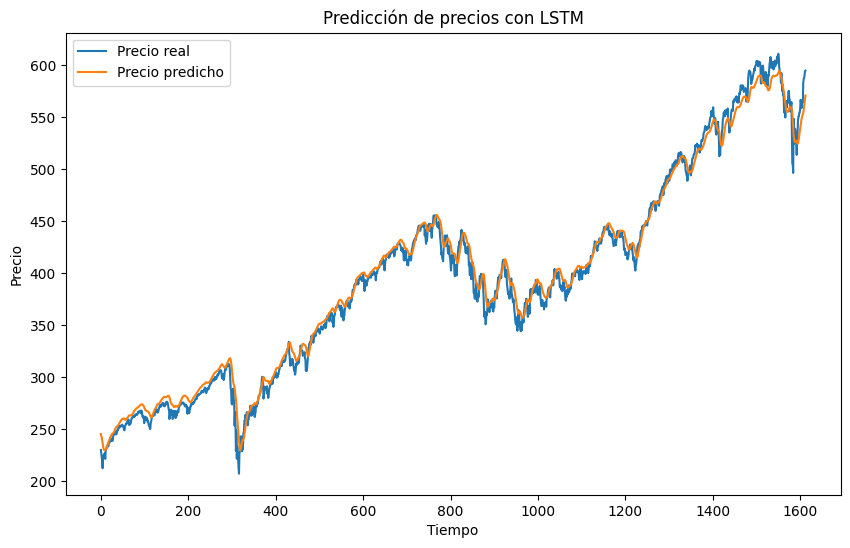

In [179]:
# 9. Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Precio real')
plt.plot(predicted_prices, label='Precio predicho')
plt.title('Predicción de precios con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [180]:
# 10. Predecir el precio del próximo día
last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape(1, sequence_length, 1)
predicted_next_day = model.predict(last_sequence)
predicted_next_day_price = scaler.inverse_transform(predicted_next_day)[0, 0]

print(f"Predicción del precio de cierre para el próximo día: ${predicted_next_day_price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicción del precio de cierre para el próximo día: $574.14
